# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models. This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to visualize these features. At the end of the notebook, we prepare clean data sets, which will be stored in the `data/` folder.

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs. For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance, returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data, I'll first get the data and clear the name to get an appropiate object.

In [1]:
# %pip install yfinance quandl

In [2]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
ma_values = [4,50,80]
rsi_values = {
    'k': 3,
    'd': 3,
    'alpha':14
}

In [4]:
tickers = [
#             'SPY',
           '^GSPC',
           '^IXIC', 
           'GC=F', 
           'SI=F',
           'CL=F', 
           '^TNX',
           'BTC-USD',
           '^N225',
           '^ftse', 
           'EURUSD=X',
           '000001.SS', 
           '^HSI',
            ]

signs = ['=','^','-','.']


def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'gspc':
        x = 'spy'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusd':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in tickers]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


gspc = spy
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusd = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [5]:
ticker_concat = " ".join(tickers)
data_ohlc = yf.download(ticker_concat, start="2008-01-01", threads=False)
# data_ticker = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  12 of 12 completed


In [6]:
data_ohlc.tail()

Adj Close                                              \
              000001.SS       BTC-USD   CL=F  EURUSD=X         GC=F   
Date                                                                  
2022-01-15          NaN  43177.398438    NaN       NaN          NaN   
2022-01-16          NaN  43113.878906    NaN       NaN          NaN   
2022-01-17  3541.669922  42250.550781    NaN  1.141070          NaN   
2022-01-18  3569.909912  42375.632812  85.43  1.141057  1812.300049   
2022-01-19  3558.179688  41767.230469  86.68  1.134816  1841.300049   

                                                                             \
                 SI=F        ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                                          
2022-01-15        NaN          NaN          NaN           NaN           NaN   
2022-01-16        NaN          NaN          NaN           NaN           NaN   
2022-01-17        NaN  7611.200195          NaN  24218.029297           NaN   
2022-01-18  23.487000  7563.600098  4577.109863  24112.779297  14506.900391   
2022-01-19  24.209999  7589.660156  4532.759766  24127.849609  14340.254883   

                                       Close                                 \
                   ^N225   ^TNX    000001.SS       BTC-USD   CL=F  EURUSD=X   
Date                                                                          
2022-01-15           NaN    NaN          NaN  43177.398438    NaN       NaN   
2022-01-16           NaN    NaN          NaN  43113.878906    NaN       NaN   
2022-01-17  28333.519531    NaN  3541.669922  42250.550781    NaN  1.141070   
2022-01-18  28257.250000  1.865  3569.909912  42375.632812  85.43  1.141057   
2022-01-19  27467.230469  1.827  3558.179688  41767.230469  86.68  1.134816   

                                                                            \
                   GC=F       SI=F        ^FTSE        ^GSPC          ^HSI   
Date                                                                         
2022-01-15          NaN        NaN          NaN          NaN           NaN   
2022-01-16          NaN        NaN          NaN          NaN           NaN   
2022-01-17          NaN        NaN  7611.200195          NaN  24218.029297   
2022-01-18  1812.300049  23.487000  7563.600098  4577.109863  24112.779297   
2022-01-19  1841.300049  24.209999  7589.660156  4532.759766  24127.849609   

                                                      High                \
                   ^IXIC         ^N225   ^TNX    000001.SS       BTC-USD   
Date                                                                       
2022-01-15           NaN           NaN    NaN          NaN  43724.671875   
2022-01-16           NaN           NaN    NaN          NaN  43436.808594   
2022-01-17           NaN  28333.519531    NaN  3546.090088  43179.390625   
2022-01-18  14506.900391  28257.250000  1.865  3579.310059  42534.402344   
2022-01-19  14340.254883  27467.230469  1.827  3578.734863  42478.304688   

                                                                      \
                 CL=F  EURUSD=X         GC=F       SI=F        ^FTSE   
Date                                                                   
2022-01-15        NaN       NaN          NaN        NaN          NaN   
2022-01-16        NaN       NaN          NaN        NaN          NaN   
2022-01-17        NaN  1.143458          NaN        NaN  7616.100098   
2022-01-18  86.629997  1.142335  1820.099976  23.487000  7613.100098   
2022-01-19  87.910004  1.136235  1843.900024  24.264999  7614.930176   

                                                                          \
                  ^GSPC          ^HSI         ^IXIC         ^N225   ^TNX   
Date                                                                       
2022-01-15          NaN           NaN           NaN           NaN    NaN   
2022-01-16          NaN           NaN           NaN           Na

In [34]:
open = data_ohlc['Open'].fillna(method='ffill')
high = data_ohlc['High'].fillna(method='ffill')
low = data_ohlc['Low'].fillna(method='ffill')
close = data_ohlc['Close'].fillna(method='ffill')
volume = data_ohlc['Volume'].fillna(method='ffill')

try:
    for x in ['open', 'high', 'low', 'close', 'volume']:
        # Renaming columns to changed labels
        exec(
            f"""
            {x}.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)')
            # taking out null values from dataset
            exec(f'{x} = {x}[{x}.notnull()]')
            print(x, exec(f'{x}.shape'))
            """)

except Exception as e:
    pass


# open.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
# high.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
# low.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
close.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)
# volume.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

(4434, 12)

## Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base. For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

<AxesSubplot:title={'center':'Returns, excluding BTC [$]'}, xlabel='Date'>

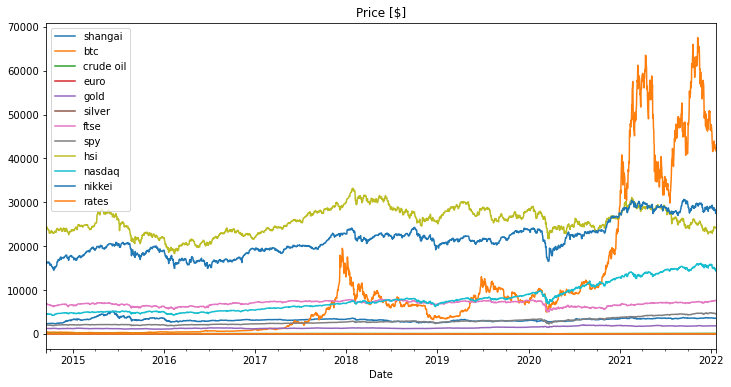

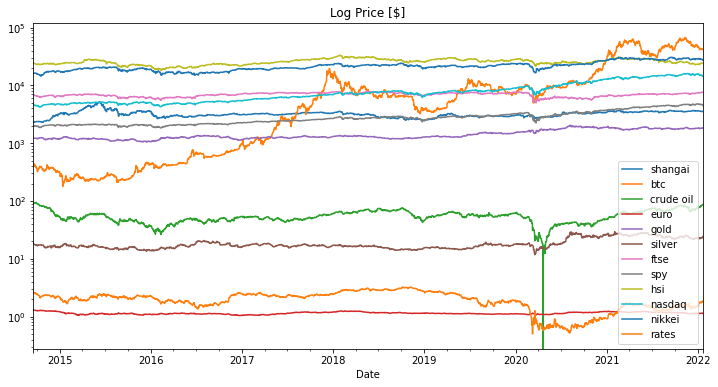

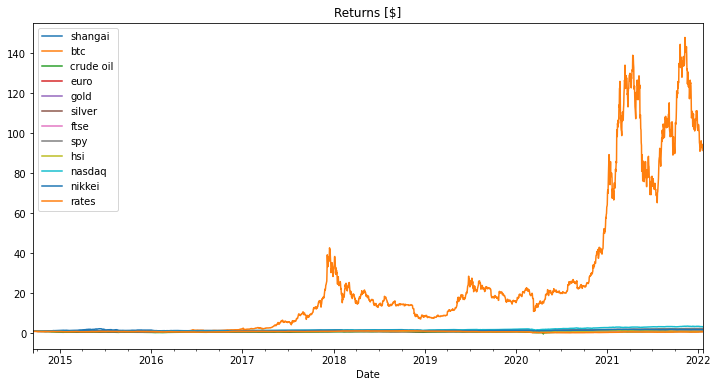

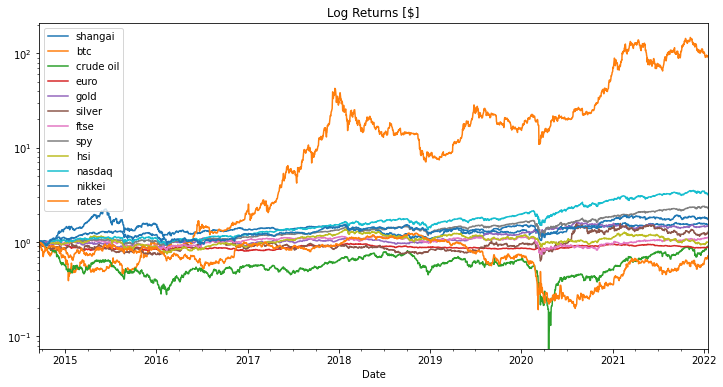

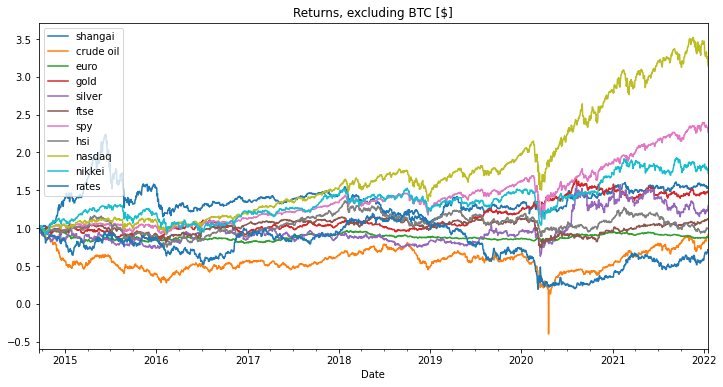

In [9]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()

close.plot(figsize=(12,6),label='Price', title='Price [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log Price [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log Returns [$]')
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Returns, excluding BTC [$]')

Even by using returns as the base metric, we can see that we needed to plot them in a logarithmic scale, for their changes to be made comparable with Bitcoin, given the astonishing returns on the asset since 2010.

### Let's have a look at volume figures to see if it makes sense to add to the model

<AxesSubplot:xlabel='Date'>

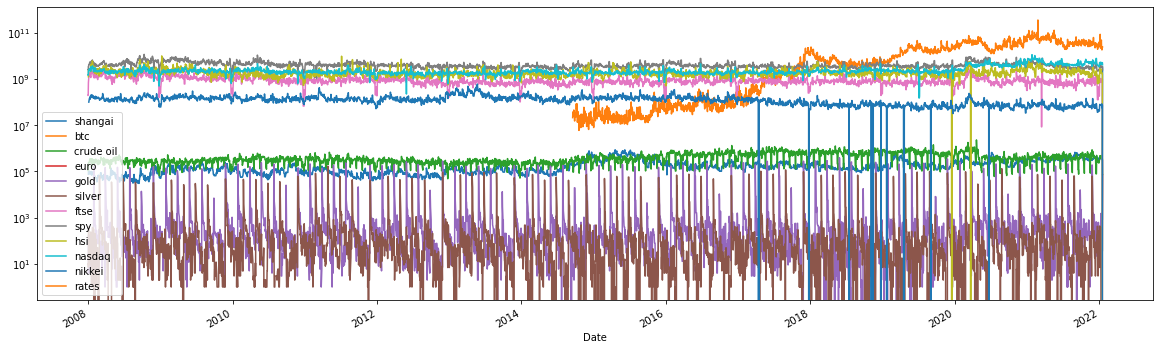

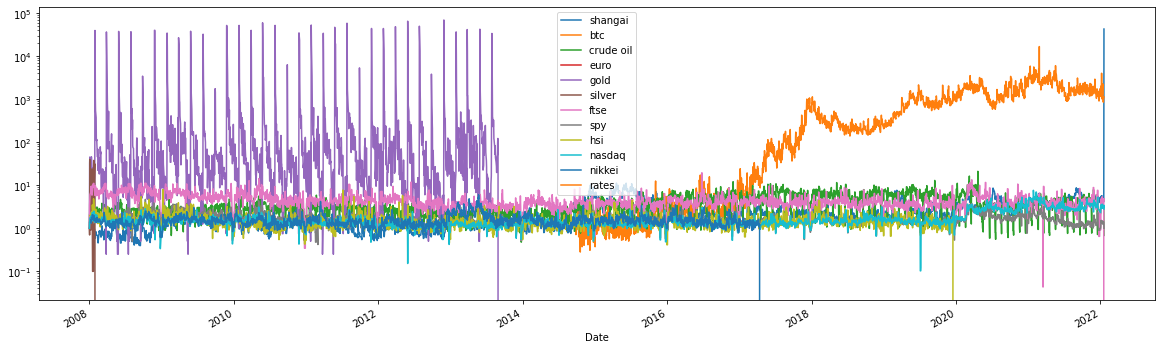

In [10]:
volume.plot(logy=True, figsize=(20,6))
v_returns = volume.pct_change(1)
v_cumulative = (1+v_returns).cumprod()
v_cumulative.plot(logy=True, figsize=(20,6))

## Performing technical analysis calculations

Now we will calculate several indicators typically used in technical analysis of stock prices, such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a. the expanding standard deviation of Bitcoin price.

### Moving Averages

In [11]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['Close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['Close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['Close'].rolling(ma3).mean(),0)    
    return data

### (Stochastic) Relative Strenght Index

In [12]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['Close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=80):
    df['btc_std_dev'] = df['change'].expanding(2).std()
    df['btc_mean'] = df['change'].expanding(2).mean()
    # df['conf_int_p'] = np.percentile(df['change'], (100-confidence)/2)
    # df['conf_int_m'] = np.percentile(df['change'], confidence + (100-confidence)/2)
    df['std_dif'] = (df['Close'] - df['btc_std_dev']).abs()

    return df

In [13]:
btc = yf.Ticker('BTC-USD')
btc = btc.history(start="2008-01-01")

btc.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
# btc = data_ticker['BTCUSD=X']
# btc = btc[btc.Close.notnull()]
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.tail()

Open          High           Low         Close  \
Date                                                                 
2022-01-15  43101.898438  43724.671875  42669.035156  43177.398438   
2022-01-16  43172.039062  43436.808594  42691.023438  43113.878906   
2022-01-17  43118.121094  43179.390625  41680.320312  42250.550781   
2022-01-18  42250.074219  42534.402344  41392.214844  42375.632812   
2022-01-19  42365.046875  42478.304688  41248.902344  41767.230469   

                 Volume      MA4     MA50     MA80    change  cum_change  \
Date                                                                       
2022-01-15  18371348298  43204.0  48215.0  53107.0  0.001803   94.411080   
2022-01-16  17902097845  42996.0  47981.0  52888.0 -0.001471   94.272189   
2022-01-17  21690904261  42910.0  47681.0  52638.0 -0.020024   92.384449   
2022-01-18  22417209227  42729.0  47372.0  52394.0  0.002960   92.657951   
2022-01-19  23629705216  42377.0  47067.0  52150.0 -0.014357   91.327627   

                   k         d       num       div        rs        RSI  \
Date                                                                      
2022-01-15  0.001803  0.000000  0.007580  0.009303  0.814823  44.898193   
2022-01-16  0.000000  0.001471  0.006570  0.008259  0.795470  44.304268   
2022-01-17  0.000000  0.020024  0.005694  0.009827  0.579356  36.683055   
2022-01-18  0.002960  0.000000  0.005329  0.008517  0.625702  38.488105   
2022-01-19  0.000000  0.014357  0.004619  0.009296  0.496849  33.192986   

               RSImin     RSImax   stochRSI  smoothK  smoothD     K1     D1  \
Date                                                                          
2022-01-15  18.789626  48.980272  86.478996    79.15    79.69  83.65  72.94   
2022-01-16  18.789626  48.980272  84.511748    84.94    82.58  79.15  79.69   
2022-01-17  18.789626  48.980272  59.268123    76.75    80.28  84.94  82.58   
2022-01-18  18.789626  48.980272  65.246963    69.68    77.12  76.75  80.28   
2022-01-19  18.789626  48.980272  47.708023    57.41    67.95  69.68  77.12   

            btc_std_dev  btc_mean       std_dif  
Date                                             
2022-01-15     0.038879  0.002463  43177.359558  
2022-01-16     0.038872  0.002462  43113.840034  
2022-01-17     0.038867  0.002453  42250.511914  
2022-01-18     0.038860  0.002454  42375.593953  
2022-01-19     0.038854  0.002447  41767.191615

In [14]:
data_ohlc.head

<bound method NDFrame.head of               Adj Close                                                   \
              000001.SS       BTC-USD        CL=F  EURUSD=X         GC=F   
Date                                                                       
2007-12-31          NaN           NaN   95.980003  1.460110   834.900024   
2008-01-01          NaN           NaN         NaN  1.462010          NaN   
2008-01-02  5272.813965           NaN   99.620003  1.471692   857.000000   
2008-01-03  5319.860840           NaN   99.180000  1.474491   866.400024   
2008-01-04  5361.574219           NaN   97.910004  1.475492   863.099976   
2008-01-07  5393.342773           NaN   95.089996  1.468299   859.599976   
2008-01-08  5386.530762           NaN   96.330002  1.557099   878.000000   
2008-01-09  5435.807129           NaN   95.669998  1.466405   879.500000   
2008-01-10  5456.541016           NaN   93.709999  1.480100   891.700012   
2008-01-11  5484.676758           NaN   92.690002  1.47900

In [15]:
btc.describe()

Open          High           Low         Close        Volume  \
count   2682.000000   2682.000000   2682.000000   2682.000000  2.682000e+03   
mean   10978.432882  11275.160555  10651.378045  10992.057906  1.458994e+10   
std    15894.482866  16324.193079  15399.262287  15899.922511  2.008768e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%      601.292511    606.648514    595.965500    602.679245  7.834820e+07   
50%     6229.204834   6368.270020   6082.739990   6233.429932  4.996205e+09   
75%    10307.317383  10487.242432  10051.714355  10311.973633  2.445239e+10   
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11   

                MA4          MA50          MA80       change   cum_change  \
count   2679.000000   2633.000000   2603.000000  2681.000000  2681.000000   
mean   10980.573348  10771.881884  10591.409143     0.002447    24.043668   
std    15878.720237  15491.409759  15104.657079     0.038854    34.770180   
min      199.000000    232.000000    234.000000    -0.371695     0.389437   
25%      604.000000    610.000000    615.000000    -0.013140     1.318166   
50%     6282.000000   6488.000000   6405.000000     0.001988    13.640030   
75%    10304.000000  10327.000000  10157.500000     0.018269    22.548325   
max    66121.000000  60802.000000  56971.000000     0.252472   147.740658   

                 k            d          num          div           rs  \
count  2682.000000  2682.000000  2682.000000  2682.000000  2681.000000   
mean      0.014034     0.011588     0.014043     0.011627     1.965546   
std       0.024908     0.023733     0.008852     0.008448     2.979304   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.007444     0.005468     0.736549   
50%       0.001976     0.000000     0.011966     0.009466     1.185445   
75%       0.018267     0.013134     0.018930     0.015783     2.154254   
max       0.252472     0.371695     0.078900     0.063441    62.372352   

               RSI       RSImin       RSImax     stochRSI      smoothK  \
count  2681.000000  2668.000000  2668.000000  2668.000000  2666.000000   
mean     55.164884    37.728384    71.524576    52.192394    52.188488   
std      17.842081    15.550275    14.142760    35.161597    31.640337   
min       0.000000     0.000000    18.604388     0.000000     0.000000   
25%      42.414509    26.264281    60.931890    20.528242    23.622500   
50%      54.242729    37.326733    71.593085    52.164567    52.610000   
75%      68.296779    48.531416    83.395290    85.764550    81.815000   
max      98.422025    81.462209    98.422025   100.000000   100.000000   

           smoothD           K1           D1  btc_std_dev     btc_mean  \
count  2664.000000  2665.000000  2663.000000  2680.000000  2680.000000   
mean     52.190766    52.186529    52.184848     0.037494     0.001324   
std      30.164650    31.646113    30.168769     0.003097     0.002798   
min       0.000000     0.000000     0.000000     0.001473    -0.070884   
25%      24.550000    23.620000    24.540000     0.035380     0.000933   
50%      52.275000    52.600000    52.230000     0.038681     0.002220   
75%      80.345000    81.820000    80.350000     0.039162     0.002580   
max     100.000000   100.000000   100.000000     0.061565     0.003865   

            std_dif  
count   2680.000000  
mean   10999.894421  
std    15903.240773  
min      178.061070  
25%      604.223811  
50%     6240.082216  
75%    10314.987676  
max    67566.789052

<AxesSubplot:title={'center':'Standard deviation of daily change'}, xlabel='Date'>

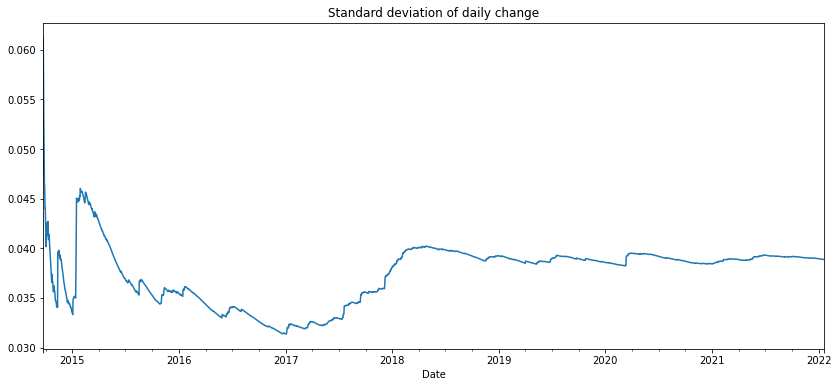

In [16]:
# btc[['High','Low','Close','std_dif']].plot(figsize=(14,6),logy=True, title='Bitcoin Price')
btc[5:]['btc_std_dev'].plot(figsize=(14,6), title='Standard deviation of daily change')

In [17]:
# Initial selection of features to the model

btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

In [18]:
data = pd.concat([cumulative, btc], axis=1)
data.drop(data.index[0], inplace=True)
data.tail()

shangai        btc  crude oil      euro      gold    silver  \
Date                                                                       
2022-01-15  1.525747  94.411080   0.887736  0.884100  1.471565  1.227616   
2022-01-16  1.525747  94.272189   0.887736  0.884100  1.471565  1.227616   
2022-01-17  1.534590  92.384449   0.887736  0.880518  1.471565  1.227616   
2022-01-18  1.546826  92.657951   0.904787  0.880508  1.468163  1.258479   
2022-01-19  1.541744  91.327627   0.918026  0.875692  1.491656  1.297219   

                ftse       spy       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2022-01-15  1.112389  2.329596  1.000283  3.264605  1.770084  0.681538   
2022-01-16  1.112389  2.329596  1.000283  3.264605  1.770084  0.681538   
2022-01-17  1.122447  2.329596  0.993503  3.264605  1.783253  0.681538   
2022-01-18  1.115427  2.286760  0.989185  3.179811  1.778453  0.717308   
2022-01-19  1.119270  2.264602  0.989803  3.143283  1.728731  0.702692   

                MA4     MA50     MA80   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2022-01-15  43204.0  48215.0  53107.0  86.478996  44.898193     0.038879   
2022-01-16  42996.0  47981.0  52888.0  84.511748  44.304268     0.038872   
2022-01-17  42910.0  47681.0  52638.0  59.268123  36.683055     0.038867   
2022-01-18  42729.0  47372.0  52394.0  65.246963  38.488105     0.038860   
2022-01-19  42377.0  47067.0  52150.0  47.708023  33.192986     0.038854   

                 std_dif  
Date                      
2022-01-15  43177.359558  
2022-01-16  43113.840034  
2022-01-17  42250.511914  
2022-01-18  42375.593953  
2022-01-19  41767.191615

## Getting fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty, (daily) number of transactions and cost per transaction.

In [19]:
import quandl
import os

# from settings import QUANDLKEY
quandl_key = os.getenv("QUANDLKEY")
quandl.ApiConfig.api_key = quandl_key # (insert if available, else there is a ratelimit)

In [20]:
print(quandl_key)

None


In [21]:

# btc mining is an interesting source, but free data has not the same quality ;)
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction
m2 = quandl.get("FED/M2_N_WM")


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [ ]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1) #, m2]
# fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost'] #, 'm2']
fundamentals.plot(figsize=(12,12), logy=True)

In [ ]:
# compare_date = '2014-09-22'
compare_date = '2020-01-21'

(1 + m2[compare_date:].pct_change()).cumprod().plot(logy=True)
(1 + returns.btc[compare_date:]).plot()

In [ ]:
m2.tail()

In [ ]:
df = pd.concat([data,fundamentals], axis=1)
df = df[df.btc.notnull()]

## Normalizing functions for dataframes

In order to make sure that no feature becomes more important in the dataset than the others, we will create functions to normalize these and bring them back to the dataset's original state. This will be used later before saving the feed-in dataset.

In [ ]:
def min_max_scaler(df, log=False):
    if log:
        df = np.log(df)
    normalized_df=(df-df.min())/(df.max()-df.min())

    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf, log=False):
    df = ndf*(maxdf-mindf) + mindf
    if log:
        df = np.exp(df)
        
    return df

In [ ]:
def standardizer(df, log=False):
    '''
    Returns log normalized and standartized df, mean and standard deviation of raw dataframe
    '''
    if log:
        df = np.log(df)
    ndf = (df-df.mean())/df.std()

    return ndf, df.mean(), df.std()

def back_standardizer(ndf, mean, std, log=False):
    df = ndf*std + mean
    if log:
        df = np.exp(df)
    return df

## Labelling buy, sell and no-trade signals

Following our end-goal, we will need to predict whether prices are going to go up or down. For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy, down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [ ]:
returns.btc.describe()

Given the confidence intervals above, I will take the top 75% interval +2.3% as buy label (1), -1.36% for the sell label (2), and the values in between as no-trade (0). The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

In [ ]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=200 , range=(-0.4, 0.6), label='Distribution of Bitcoin daily returns')

In [ ]:
plt.figure(figsize = (15,6))
plt.hist(cumulative.btc, bins=200, label='Distribution of Bitcoin daily returns')

In [ ]:
logy = np.log(cumulative.btc)
logy.hist(bins=200, figsize=(14,6))

In [ ]:
cumulative.columns

In [ ]:
for x in ['shangai', 'btc', 'oil', 'euro', 'gold', 'silver', 'ftse', 'spy',
       'hsi', 'nasdaq', 'nikkei', 'rates']:
    try:
        exec(f'np.log(cumulative.{x}).plot(figsize=(20,10))')
    except Exception:
        print('shit')

In [ ]:
labels = 0

In [ ]:
labels = pd.DataFrame(returns.btc)
labels['returns'] = returns.btc
labels = pd.concat([labels.returns, close.btc[close.btc.notnull()]], axis =1)
labels.rename(columns={'btc':'btc_close'}, inplace=True)

In [ ]:
buy_cond = labels.returns > 0.022985 # returns.btc.describe()['75%']
sell_cond = labels.returns < -0.013636 # returns.btc.describe()['25%']

labels['c_label'] = 0
labels['c_label'] = labels['c_label'].mask(buy_cond, 1)
labels['c_label'] = labels['c_label'].mask(sell_cond, -1)


# Backtesting, used for later

labels['bkt_returns'] = 0
labels['bkt_returns'] = labels['bkt_returns'].mask(buy_cond, labels.returns)
labels['bkt_returns'] = labels['bkt_returns'].mask(sell_cond, labels.returns)

labels.head()

In [ ]:
# row data cleaning
df.describe().loc['count'].min()

### Data cleaning
I'll consider the minimal available records as starting point and select the training data. Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [ ]:
df = pd.concat([df,labels], axis=1)
df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df = df[-int(df.describe().loc['count'].min()):]
df.describe()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

In [ ]:
df['returns_label'] = df['c_label']
df['c_label'] = df['c_label'].shift(-1)
df['r_label'] = df['btc_close'].shift(-1)

df.tail()

# Normalization step
### Pick your poison

In [ ]:
# ndf, mindf, maxdf = min_max_scaler(df, log=False)

ndf, mean, std = standardizer(df, log=False)

In [ ]:
ndf.tail()

## Correlation between all features and labels used

In [ ]:
# Correlation of BTC with features

cor_list = df.corr()['btc_cumulative'].sort_values(ascending=False).round(2)
cor_list.drop(index=['btc_cumulative', 'btc_close', 'std_dif', 'MA4', 'r_label', 'MA96', 't_cost',
    'MA200', 'transactions', 'btc_std_dev',
    'RSI', 'bkt_returns', 'returns', 'stochRSI',
    'returns_label', 'c_label', 'difficulty', 'hashrate' ])

In [ ]:
# Normalized correlation does not change, uncomment below to see

ndf.corr().btc_cumulative

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [ ]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

## Splitting the data for training and testing

We will take as training data from beginning of time until 2018, and test data from 2018-01-01 onwards.

In [ ]:
df.btc_close.loc[:].plot(figsize=(12,8), logy=True, title='BTC price (log scale)')

In [ ]:
train_x = df.loc[:'2018-01-01']
train_nx = ndf.loc[:'2018-01-01']

test_x = df.loc['2018-01-01':]
test_nx = ndf.loc['2018-01-01':]

# Dropping last column of test (since they are shifted)
test_x.drop(test_x.index[-1], inplace=True)
test_nx.drop(test_nx.index[-1], inplace=True)

# Create labels for regression (price forecast) and classification (trading prediction)
train_y = train_x[['r_label', 'c_label']]
train_ny = train_nx[['r_label', 'c_label']]

test_y = test_x[['r_label', 'c_label']]
test_ny = test_nx[['r_label', 'c_label']]

test_x.tail()

In [ ]:
# Drop labels and unneeded columns on train & test feature data sets
drop_list = ['r_label','c_label','bkt_returns']
drop_df = [train_x, train_nx, test_x, test_nx]

for x in drop_df:
    x.drop(columns=drop_list, inplace=True)
#     x['ts'] = x['Date'].datetime.astype('int64') // 10**9
#     x.set_index('ts')
#     x.drop(columns=['ts'], inplace=True)

## Storing the data for future use

In [ ]:
# Storing original and normalized data in CSVs
store_list = [train_x, train_nx, test_x, test_nx, train_y, train_ny, test_y, test_ny]
# !mkdir data
store_name = ['data/train_x.csv', 'data/train_nx.csv', 'data/test_x.csv', 'data/test_nx.csv', 'data/train_y.csv', 'data/train_ny.csv', 'data/test_y.csv', 'data/test_ny.csv']

for i in range(len(store_list)):
    store_list[i].to_csv(store_name[i])

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI), stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the historical distribution of daily Bitcoin returns. 
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored training and testing data.

# What comes next?

In the next notebook, you will find the following sections:

- **Splitting the data** into test, train and labels
- **PCA for dimensionality reduction** / feature selection
- **XGBoost for price forecasting and trading signal**
- **Neural network for price forecasting and trading signal**
- **Final discussion and model comparisson**

# Additional experiments